In [1]:
!pip install seaborn==0.9.1

In [2]:
import seaborn as sns

print(sns.__version__)

0.9.1


In [3]:
!pip install graphviz==0.9
!pip install pydot

In [4]:
!apt-get install graphviz

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [5]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [6]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
55,76666.68,0,16,24846.60026
41,57463.74,0,15,23114.95042
42,41296.05,0,10,19485.88872
43,96446.05,0,17,38476.10072
45,64387.60,0,10,23609.01780


In [7]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [58.00, 58.00]


In [8]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [72.89, 78.67]


In [9]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [10]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [11]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.07, 79.29]


In [12]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.80
Intervalo [72.90, 78.69]


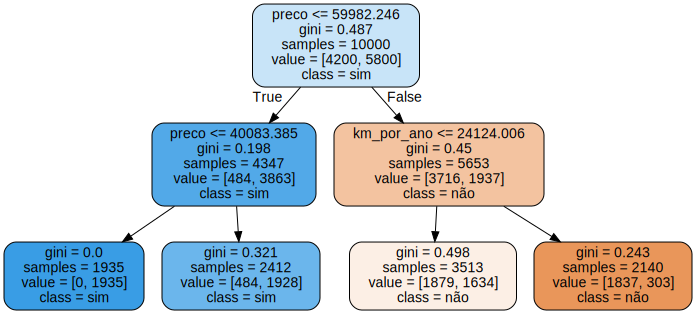

In [13]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [14]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.68
Intervalo [75.57, 81.80]


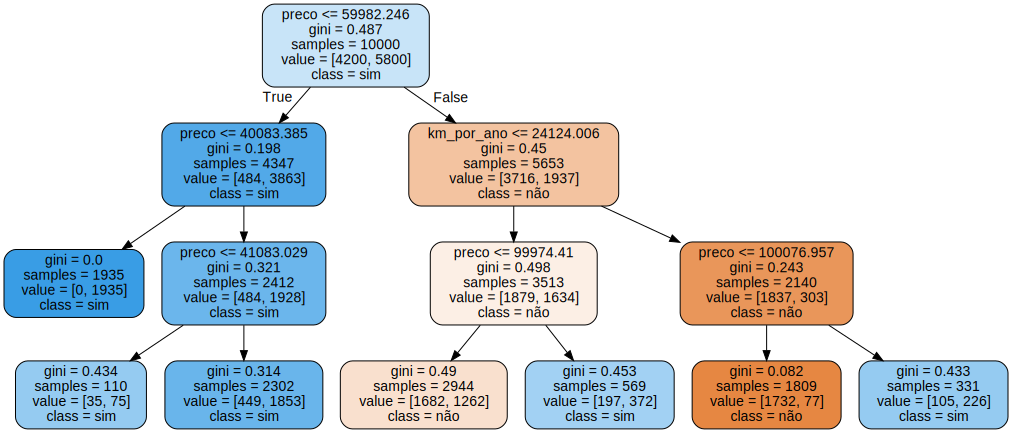

In [15]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [16]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.97
Intervalo [75.03, 78.91]


# Explorando hiper parâmetros em uma dimensão

In [17]:
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, treino = %.2f, teste = %.2f" % (max_depth, train_score, test_score))
  tabela = [max_depth, train_score, test_score]
  return tabela
  
resultados = [roda_arvore_de_decisao(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados, columns= ["max_depth","train","test"])
resultados.head()

Arvore max_depth = 1, treino = 75.79, teste = 75.80
Arvore max_depth = 2, treino = 75.79, teste = 75.80
Arvore max_depth = 3, treino = 78.75, teste = 78.68
Arvore max_depth = 4, treino = 78.79, teste = 78.66
Arvore max_depth = 5, treino = 78.95, teste = 78.59
Arvore max_depth = 6, treino = 79.14, teste = 78.54
Arvore max_depth = 7, treino = 79.44, teste = 78.31
Arvore max_depth = 8, treino = 79.82, teste = 77.90
Arvore max_depth = 9, treino = 80.33, teste = 77.45
Arvore max_depth = 10, treino = 81.05, teste = 76.97
Arvore max_depth = 11, treino = 81.86, teste = 76.66
Arvore max_depth = 12, treino = 82.82, teste = 76.31
Arvore max_depth = 13, treino = 83.90, teste = 75.96
Arvore max_depth = 14, treino = 84.88, teste = 75.41
Arvore max_depth = 15, treino = 85.93, teste = 75.01
Arvore max_depth = 16, treino = 87.04, teste = 74.91
Arvore max_depth = 17, treino = 88.07, teste = 74.53
Arvore max_depth = 18, treino = 89.13, teste = 74.26
Arvore max_depth = 19, treino = 90.20, teste = 73.83
Ar

,max_depth,train,test
0,1,75.791308,75.795015
1,2,75.791308,75.795015
2,3,78.751166,78.683167
3,4,78.788947,78.663124
4,5,78.949014,78.591557


<Axes: xlabel='max_depth', ylabel='train'>

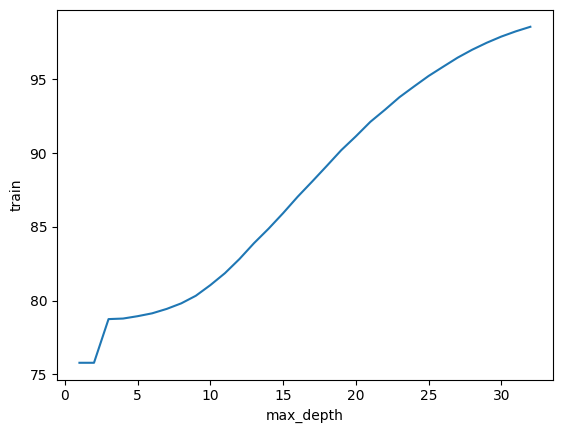

In [18]:
import seaborn as sns

np.float = float
sns.lineplot(x = "max_depth", y = "train", data = resultados)

# OVERFIT: ficou "perfeito" para o treino mas ruim para o teste

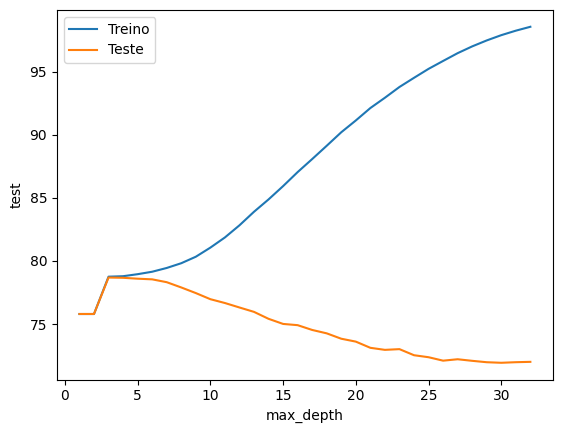

In [19]:
import matplotlib.pyplot as plt

sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["Treino", "Teste"])

In [20]:
resultados.sort_values("test", ascending=False).head()

,max_depth,train,test
2,3,78.751166,78.683167
3,4,78.788947,78.663124
4,5,78.949014,78.591557
5,6,79.143373,78.540192
6,7,79.442263,78.314519


# Explorando hiper parâmetros em 2 dimensões

In [21]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, min_samples_leaf = %d, treino = %.2f, teste = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
  return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 32, treino = 75.79, teste = 75.80
Arvore max_depth = 1, min_samples_leaf = 64, treino = 75.79, teste = 75.80
Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.80
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 32, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 64, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.80
Arvore max_depth = 3, min_samples_leaf = 32, treino = 78.75, teste = 78.68
Arvore max_depth = 3, min_samples_leaf = 64, treino = 78.75, teste = 78.68
Arvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.68
Arvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.68
Arvore max_depth = 4, min_samples_leaf = 32, treino = 78.75, teste = 78.68
Arvore max_depth = 

,max_depth,min_samples_leaf,train,test
0,1,32,75.791308,75.795015
1,1,64,75.791308,75.795015
2,1,128,75.791308,75.795015
3,1,256,75.791308,75.795015
4,2,32,75.791308,75.795015


In [22]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
15,4,256,78.751166,78.683167
19,5,256,78.751166,78.683167
10,3,128,78.751166,78.683167
8,3,32,78.751166,78.683167
13,4,64,78.751166,78.683167


In [23]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.780775e-16,0.550028,0.000774
min_samples_leaf,-2.780775e-16,1.000000e+00,-0.406407,0.437464
train,5.500279e-01,-4.064066e-01,1.000000,0.129546
test,7.744906e-04,4.374643e-01,0.129546,1.000000


<Axes: >

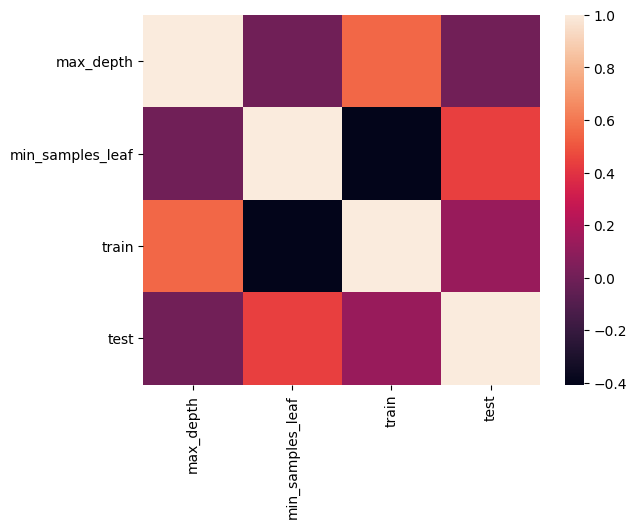

In [24]:
np.bool = bool
sns.heatmap(corr)

array([[<Axes: xlabel='max_depth', ylabel='max_depth'>,
        <Axes: xlabel='min_samples_leaf', ylabel='max_depth'>,
        <Axes: xlabel='train', ylabel='max_depth'>,
        <Axes: xlabel='test', ylabel='max_depth'>],
       [<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>,
        <Axes: xlabel='min_samples_leaf', ylabel='min_samples_leaf'>,
        <Axes: xlabel='train', ylabel='min_samples_leaf'>,
        <Axes: xlabel='test', ylabel='min_samples_leaf'>],
       [<Axes: xlabel='max_depth', ylabel='train'>,
        <Axes: xlabel='min_samples_leaf', ylabel='train'>,
        <Axes: xlabel='train', ylabel='train'>,
        <Axes: xlabel='test', ylabel='train'>],
       [<Axes: xlabel='max_depth', ylabel='test'>,
        <Axes: xlabel='min_samples_leaf', ylabel='test'>,
        <Axes: xlabel='train', ylabel='test'>,
        <Axes: xlabel='test', ylabel='test'>]], dtype=object)

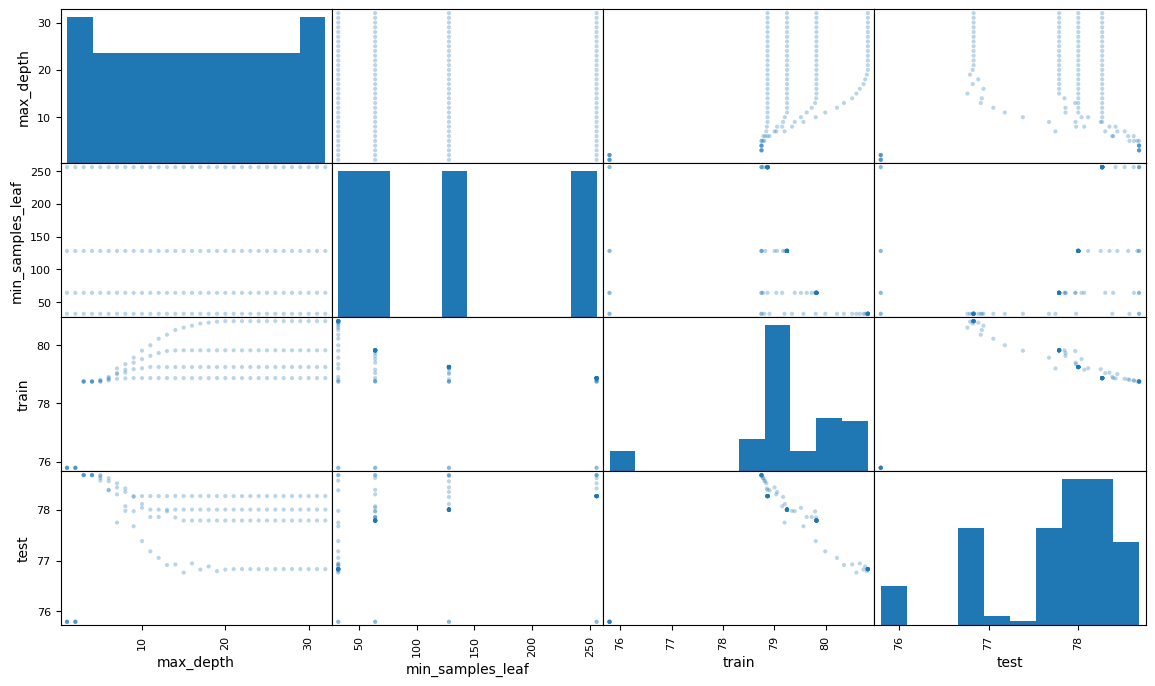

In [25]:
pd.plotting.scatter_matrix(resultados, figsize = (14, 8), alpha = 0.3)

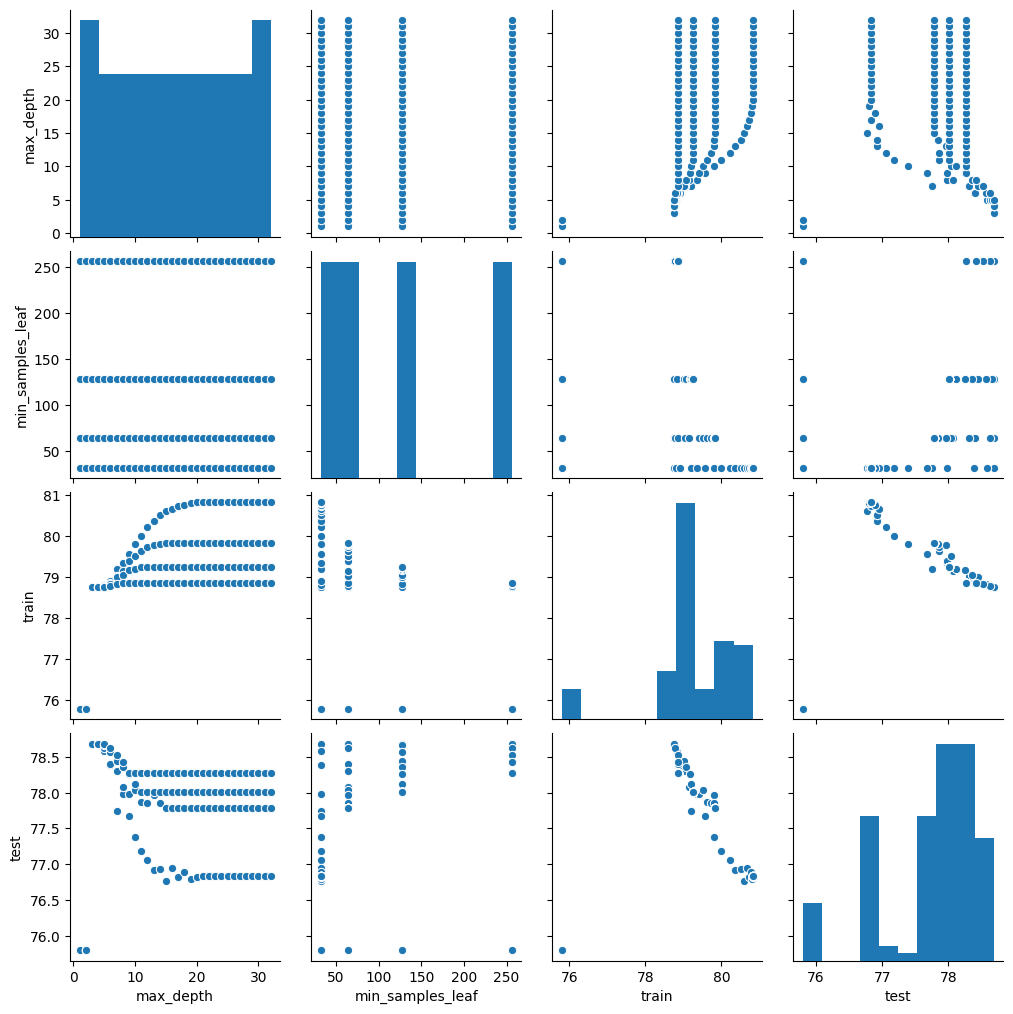

In [26]:
np.object = object
sns.pairplot(resultados)

<Axes: >

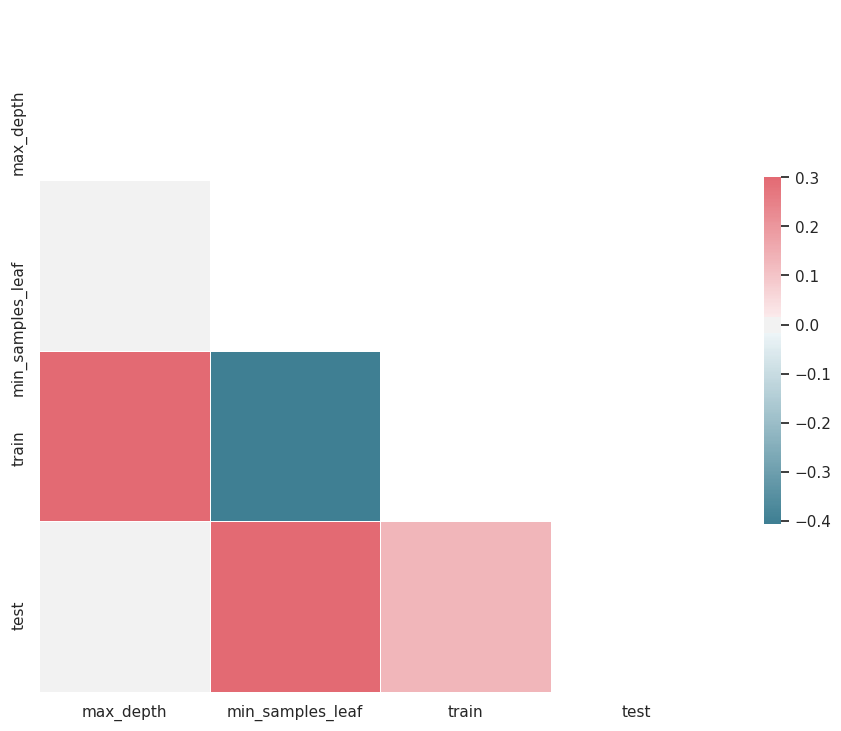

In [27]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [128, 192, 256, 512]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
  return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.80
Arvore max_depth = 1, min_samples_leaf = 192, treino = 75.79, teste = 75.80
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.80
Arvore max_depth = 1, min_samples_leaf = 512, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 192, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 512, treino = 75.79, teste = 75.80
Arvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.68
Arvore max_depth = 3, min_samples_leaf = 192, treino = 78.75, teste = 78.68
Arvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.68
Arvore max_depth = 3, min_samples_leaf = 512, treino = 77.52, teste = 77.51
Arvore max_depth = 4, min_samples_leaf = 128, treino = 78.75, teste = 78.68
Arvore max_d

,max_depth,min_samples_leaf,train,test
0,1,128,75.791308,75.795015
1,1,192,75.791308,75.795015
2,1,256,75.791308,75.795015
3,1,512,75.791308,75.795015
4,2,128,75.791308,75.795015


In [29]:
corr = resultados.corr()

<Axes: >

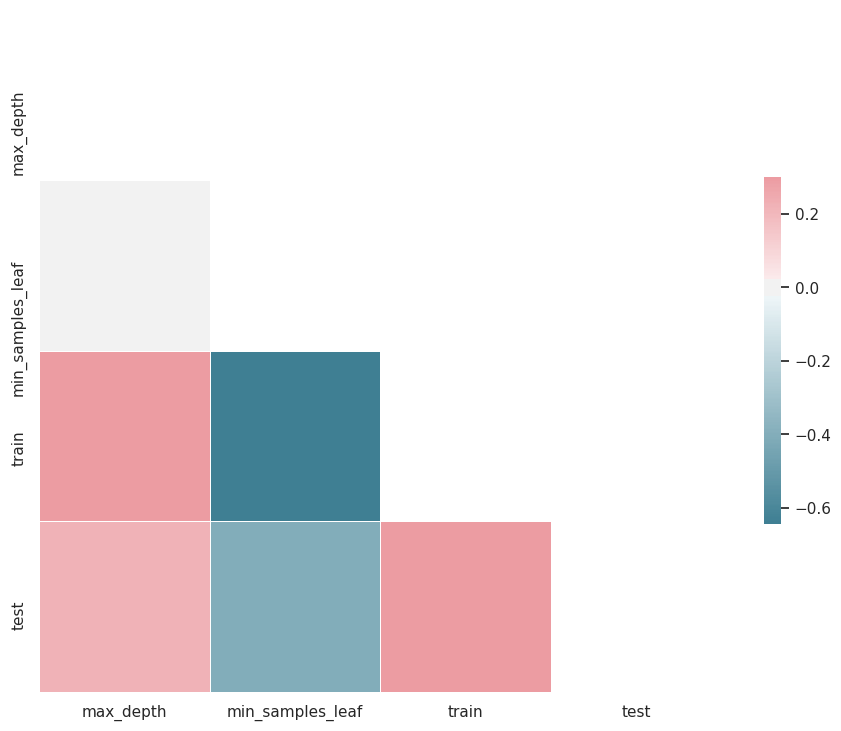

In [30]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
18,5,256,78.751166,78.683167
17,5,192,78.751166,78.683167
14,4,256,78.751166,78.683167
8,3,128,78.751166,78.683167
10,3,256,78.751166,78.683167


# Explorando 3 dimensões de hiper parâmetros

In [32]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      for min_samples_split in [32, 64, 128, 256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","min_samples_split","train","test", "fit_time", "score_time"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791308,75.795015,0.003734,0.000976
1,1,32,64,75.791308,75.795015,0.003362,0.000886
2,1,32,128,75.791308,75.795015,0.003298,0.000855
3,1,32,256,75.791308,75.795015,0.003350,0.000867
4,1,64,32,75.791308,75.795015,0.003234,0.000814


In [33]:
corr = resultados.corr()

<Axes: >

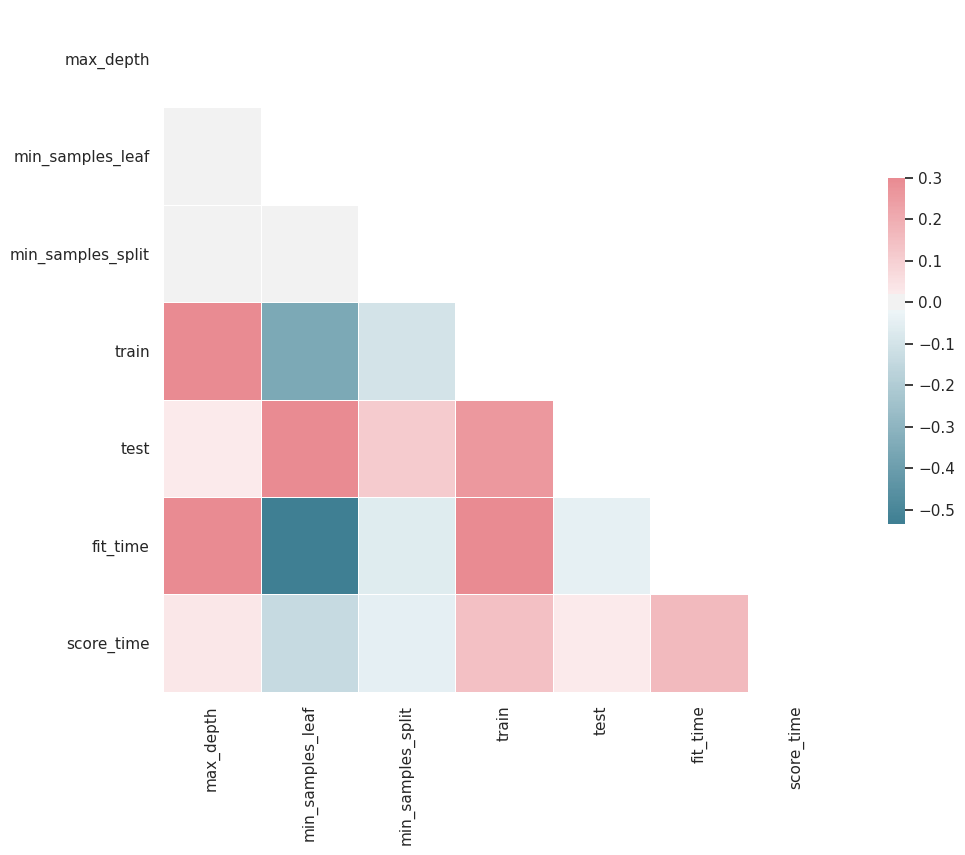

In [34]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [35]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
62,4,256,128,78.751166,78.683167,0.007822,0.000962
63,4,256,256,78.751166,78.683167,0.007868,0.000898
48,4,32,32,78.751166,78.683167,0.008205,0.000923
76,5,256,32,78.751166,78.683167,0.008780,0.000933
78,5,256,128,78.751166,78.683167,0.008784,0.000902


# Explorando espaço de hiper parâmetros com GridSearchCV

In [36]:
from sklearn.model_selection import GridSearchCV

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = GroupKFold(n_splits = 10))
busca.fit(x_azar, y_azar, groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006851,0.000306,0.000970,0.000157,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767096,...,0.818905,0.774063,0.806773,0.794147,0.771717,0.792857,0.777154,0.786832,0.01558,1
1,0.006840,0.000324,0.000998,0.000214,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767096,...,0.818905,0.774063,0.806773,0.794147,0.771717,0.792857,0.777154,0.786832,0.01558,1
2,0.006584,0.000105,0.000870,0.000073,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767096,...,0.818905,0.774063,0.806773,0.794147,0.771717,0.792857,0.777154,0.786832,0.01558,1
3,0.006593,0.000088,0.000880,0.000091,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767096,...,0.818905,0.774063,0.806773,0.794147,0.771717,0.792857,0.777154,0.786832,0.01558,1
4,0.006530,0.000062,0.000853,0.000065,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767096,...,0.818905,0.774063,0.806773,0.794147,0.771717,0.792857,0.777154,0.786832,0.01558,1


In [37]:
print(busca.best_params_)
print(busca.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.68316661476126


In [38]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [39]:
from sklearn.metrics import accuracy_score

# evitar essa abordagem pois estará sendo otimista

predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes, y_azar) * 100
print("Accuracy para os dados foi %.2f%%" % accuracy)

Accuracy para os dados foi 78.75%


# Como ter uma estimativa sem esse vício nos dados que eu já vi?

No caso de cross validation com busca de hiper parâmetros, fazemos uma nova validação cruzada. Chama-se nested cross validation

In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = GroupKFold(n_splits=10), groups = dados.modelo)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning/Machine_Learning_parte2/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning/Machine_Learning_parte2/.venv/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning/Machine_Learning_parte2/.venv/lib/python3.10/site-packages/sklearn/model_selection/_search.py", line 898, in fit
    self._run_search(evaluate_candidates)
  File "/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning/Machine_Learning_parte2/.venv/lib/python3.10/site-packages/sklearn/model_selection/_search.py", line 1422, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning/Machine_Learning_parte2/.venv/lib/python3.10/site-packages/sklearn/model_selection/_search.py", line 857, in evaluate_candidates
    for (cand_idx, parameters), (split_idx, (train, test)) in product(
  File "/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning/Machine_Learning_parte2/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py", line 377, in split
    for train, test in super().split(X, y, groups):
  File "/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning/Machine_Learning_parte2/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py", line 108, in split
    for test_index in self._iter_test_masks(X, y, groups):
  File "/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning/Machine_Learning_parte2/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py", line 120, in _iter_test_masks
    for test_index in self._iter_test_indices(X, y, groups):
  File "/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning/Machine_Learning_parte2/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py", line 563, in _iter_test_indices
    raise ValueError("The 'groups' parameter should not be None.")
ValueError: The 'groups' parameter should not be None.


# Infelizmente como o Pandas não suporta nested validation com group k fold não conseguimos prever o resultado para novos grupos

In [41]:
from sklearn.model_selection import GridSearchCV, KFold

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006243,0.000438,0.000942,0.000157,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7825,0.7915,0.7965,0.777,0.7875,0.787,0.006797,1
1,0.006241,0.000381,0.001147,0.000250,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7825,0.7915,0.7965,0.777,0.7875,0.787,0.006797,1
2,0.005769,0.000070,0.000854,0.000077,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7825,0.7915,0.7965,0.777,0.7875,0.787,0.006797,1
3,0.005820,0.000040,0.000852,0.000069,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7825,0.7915,0.7965,0.777,0.7875,0.787,0.006797,1
4,0.005879,0.000107,0.000902,0.000105,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7825,0.7915,0.7965,0.777,0.7875,0.787,0.006797,1


In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
scores

array([0.803 , 0.7745, 0.7855, 0.785 , 0.787 ])

In [43]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [44]:
imprime_score(scores)

Accuracy médio 78.70
Intervalo [76.87, 80.53]


In [45]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)


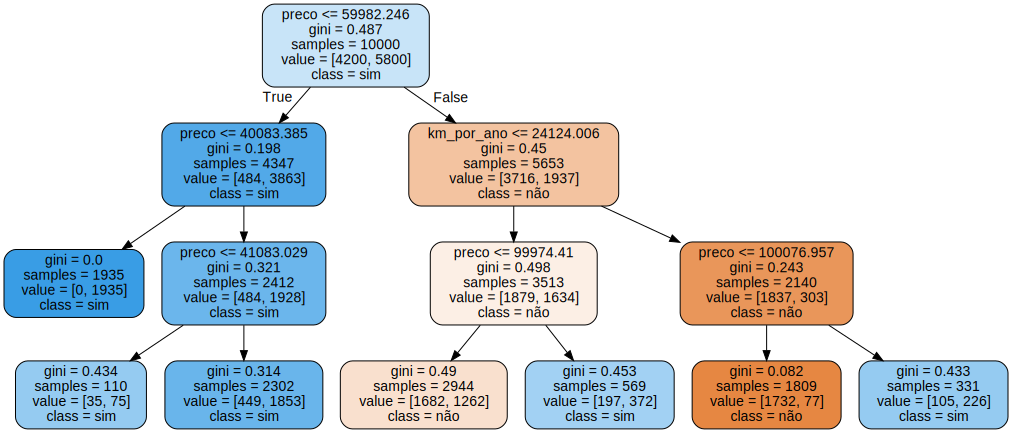

In [46]:
from sklearn.tree import export_graphviz
import graphviz

features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names = features)
graph = graphviz.Source(dot_data)
graph

## Busca aleatória: RandomSearch

In [47]:
from sklearn.model_selection import RandomizedSearchCV, KFold

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    n_iter=16,
                    cv = KFold(n_splits = 5, shuffle=True),
                    random_state=SEED)
busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008759,0.000460,0.001126,0.000124,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.7775,0.7915,0.7885,0.777,0.7875,0.7844,0.005987,16
1,0.006235,0.000131,0.001051,0.000134,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.7825,0.7915,0.7965,0.777,0.7875,0.7870,0.006797,1
2,0.006753,0.000343,0.001335,0.000292,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.7825,0.7915,0.7965,0.777,0.7875,0.7870,0.006797,1
3,0.010514,0.000101,0.001526,0.000221,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.7775,0.7915,0.7935,0.777,0.7875,0.7854,0.006931,10
4,0.010918,0.000304,0.001604,0.000336,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.7775,0.7915,0.7935,0.777,0.7875,0.7854,0.006931,10


In [48]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv=KFold(n_splits=5, shuffle=True))
imprime_score(scores)

Accuracy médio 78.69
Intervalo [75.93, 81.45]


In [50]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=64)

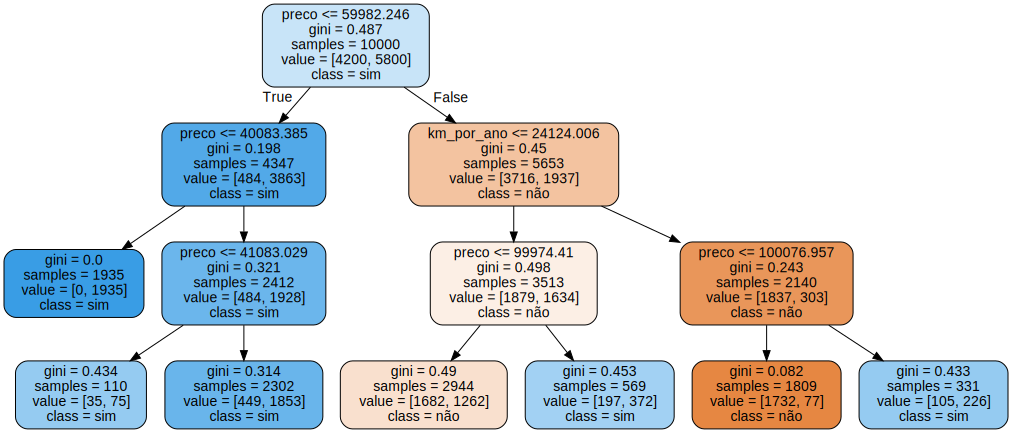

In [51]:
from sklearn.tree import export_graphviz
import graphviz

features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names = features)
graph = graphviz.Source(dot_data)
graph

## Customizando o espaço de hiper parâmetros

In [52]:
# from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split" : randint(32, 128),
    "min_samples_leaf" : randint(32, 128),
    "criterion" : ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    n_iter=16,
                    cv = KFold(n_splits = 5, shuffle=True),
                    random_state=SEED)
busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006959,0.000336,0.001009,0.000137,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.7825,0.7915,0.7965,0.7770,0.7875,0.7870,0.006797,1
1,0.011346,0.000474,0.001063,0.000113,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7790,0.7810,0.7855,0.7750,0.7855,0.7812,0.004007,9
2,0.010672,0.000254,0.001163,0.000110,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7795,0.7805,0.7845,0.7735,0.7850,0.7806,0.004152,13
3,0.013643,0.000720,0.001031,0.000095,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.7720,0.7735,0.7725,0.7670,0.7720,0.7714,0.002267,16
4,0.010573,0.000380,0.001001,0.000074,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7795,0.7805,0.7845,0.7735,0.7850,0.7806,0.004152,13


In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv=KFold(n_splits=5, shuffle=True))
imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Accuracy médio 78.69
Intervalo [75.93, 81.45]
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


In [54]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
    print('%.3f, +- (%.3f), %s' % (linha.mean_test_score, linha.std_test_score * 2, linha.params))

0.787, +- (0.014), {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.785, +- (0.014), {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 73, 'min_samples_split': 72}
0.785, +- (0.014), {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.783, +- (0.006), {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 101, 'min_samples_split': 52}
0.783, +- (0.007), {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 103, 'min_samples_split': 96}
0.782, +- (0.013), {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 74, 'min_samples_split': 58}
0.782, +- (0.006), {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 100, 'min_samples_split': 84}
0.781, +- (0.005), {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 125, 'min_samples_split': 59}
0.781, +- (0.008), {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 93, 'min_samples_split': 111}
0.781, +- (0.008), {'cr

## Uma exploração mais a fundo de forma aleatória

In [55]:
# from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split" : randint(32, 128),
    "min_samples_leaf" : randint(32, 128),
    "criterion" : ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    n_iter=64,
                    cv = KFold(n_splits = 5, shuffle=True),
                    random_state=SEED)
busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007527,0.000662,0.001171,0.000185,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.7825,0.7915,0.7965,0.7770,0.7875,0.7870,0.006797,1
1,0.012801,0.000616,0.001632,0.000419,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7790,0.7810,0.7855,0.7750,0.7855,0.7812,0.004007,27
2,0.011219,0.000236,0.001152,0.000087,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7795,0.7805,0.7845,0.7735,0.7850,0.7806,0.004152,34
3,0.014179,0.000995,0.001186,0.000099,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.7720,0.7735,0.7725,0.7670,0.7720,0.7714,0.002267,58
4,0.010921,0.000685,0.001036,0.000056,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7795,0.7805,0.7845,0.7735,0.7850,0.7806,0.004152,34


In [56]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
    print('%.3f, +- (%.3f), %s' % (linha.mean_test_score, linha.std_test_score * 2, linha.params))

0.787, +- (0.014), {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.787, +- (0.014), {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 67, 'min_samples_split': 76}
0.787, +- (0.014), {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 69, 'min_samples_split': 124}
0.787, +- (0.014), {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 63, 'min_samples_split': 88}
0.787, +- (0.014), {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 53, 'min_samples_split': 111}
0.787, +- (0.014), {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 120, 'min_samples_split': 46}
0.787, +- (0.014), {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 65, 'min_samples_split': 50}
0.787, +- (0.014), {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 106, 'min_samples_split': 108}
0.786, +- (0.014), {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 45, 'min_samples_split': 103}
0.785, +- (0.014), {'criter

In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv=KFold(n_splits=5, shuffle=True))
imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Accuracy médio 78.69
Intervalo [77.01, 80.37]
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


# Comparando GridSearchCV com RandomizedSearch (1 Comparação)

In [58]:
import time
from sklearn.ensemble import RandomForestClassifier

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators": [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "bootstrap": [True, False],
    "criterion" : ["gini", "entropy"]
}

t1 = time.time()
busca = GridSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(x_azar, y_azar)
t2 = time.time()
print('Tempo percorrido %.2f segundos' % (t2 - t1))

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo percorrido 108.58 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021491,0.001359,0.002172,0.000035,True,gini,3,32,32,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7725,0.7775,0.7215,0.7700,0.7445,0.7572,0.021193,138
1,0.194373,0.002395,0.010391,0.000147,True,gini,3,32,32,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7690,0.7720,0.7800,0.7695,0.7750,0.7731,0.004055,77
2,0.021248,0.000697,0.002073,0.000076,True,gini,3,32,64,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7725,0.7820,0.7725,0.7715,0.7795,0.7756,0.004294,31
3,0.192274,0.002188,0.010399,0.000075,True,gini,3,32,64,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7685,0.7810,0.7790,0.7690,0.7755,0.7746,0.005093,72
4,0.020494,0.000971,0.002134,0.000097,True,gini,3,32,128,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7625,0.7625,0.7265,0.7625,0.7710,0.7570,0.015601,139


In [59]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
    print('%.3f, +- (%.3f), %s' % (linha.mean_test_score, linha.std_test_score * 2, linha.params))

0.780, +- (0.007), {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.780, +- (0.011), {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 32, 'n_estimators': 10}
0.779, +- (0.009), {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 10}
0.779, +- (0.015), {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 32, 'n_estimators': 10}
0.779, +- (0.010), {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 10}


In [60]:
t1 = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv=KFold(n_splits=5, shuffle=True))
t2 = time.time()
print('Tempo percorrido %.2f segundos' % (t2 - t1))

imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo percorrido 460.49 segundos
Accuracy médio 77.46
Intervalo [75.43, 79.49]
RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=64,
                       min_samples_split=64, n_estimators=10)


In [64]:
import time
from sklearn.ensemble import RandomForestClassifier

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators": [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "bootstrap": [True, False],
    "criterion" : ["gini", "entropy"]
}

t1 = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter=80,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(x_azar, y_azar)
t2 = time.time()
print('Tempo percorrido %.2f segundos' % (t2 - t1))

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo percorrido 62.56 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.208020,0.002952,0.010774,0.000223,100,32,128,3,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.7770,0.7735,0.7730,0.7670,0.7785,0.7738,0.003982,49
1,0.029068,0.001126,0.002423,0.000071,10,32,128,5,entropy,True,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.7655,0.7755,0.7670,0.7740,0.7740,0.7712,0.004106,58
2,0.287415,0.003675,0.012549,0.000119,100,32,32,5,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.7790,0.7835,0.7730,0.7765,0.7790,0.7782,0.003444,4
3,0.021397,0.000754,0.002262,0.000114,10,128,32,3,gini,True,"{'n_estimators': 10, 'min_samples_split': 128,...",0.7705,0.7575,0.7305,0.7440,0.7745,0.7554,0.016415,76
4,0.029292,0.001603,0.002332,0.000081,10,64,32,3,entropy,False,"{'n_estimators': 10, 'min_samples_split': 64, ...",0.7865,0.7725,0.7415,0.7360,0.7750,0.7623,0.019876,71


In [65]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
    print('%.3f, +- (%.3f), %s' % (linha.mean_test_score, linha.std_test_score * 2, linha.params))

0.780, +- (0.011), {'n_estimators': 10, 'min_samples_split': 128, 'min_samples_leaf': 64, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}
0.778, +- (0.005), {'n_estimators': 10, 'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}
0.778, +- (0.006), {'n_estimators': 10, 'min_samples_split': 64, 'min_samples_leaf': 64, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.778, +- (0.007), {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.778, +- (0.017), {'n_estimators': 10, 'min_samples_split': 128, 'min_samples_leaf': 64, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}


In [66]:
t1 = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv=KFold(n_splits=5, shuffle=True))
t2 = time.time()
print('Tempo percorrido %.2f segundos' % (t2 - t1))

imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo percorrido 264.91 segundos
Accuracy médio 77.52
Intervalo [76.09, 78.95]
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       min_samples_leaf=64, min_samples_split=128,
                       n_estimators=10)


# 05.02.Treino teste validação, otimização sem validação cruzada

### Se eu não posso ou não consigo usar o `cross validation`

In [70]:
# 0.6 treino
# 0.2 teste
# 0.2 validação

from sklearn.model_selection import train_test_split

SEED = 301
np.random.seed(SEED)

x_treino_teste, x_validacao, y_treino_teste, y_validacao = train_test_split(x_azar, y_azar, test_size=0.2, shuffle=True, stratify=y_azar)
print(x_treino_teste.shape)
print(x_validacao.shape)
print(y_treino_teste.shape)
print(y_validacao.shape)

(8000, 3)
(2000, 3)
(8000,)
(2000,)


In [71]:
from sklearn.model_selection import StratifiedShuffleSplit

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators": [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "bootstrap": [True, False],
    "criterion" : ["gini", "entropy"]
}

split = StratifiedShuffleSplit(n_splits=1, test_size=0.25)

t1 = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                           espaco_de_parametros,
                           n_iter=5,
                           cv=split)
busca.fit(x_treino_teste, y_treino_teste)
t2 = time.time()
print('Tempo percorrido %.2f segundos' % (t2 - t1))

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo percorrido 0.75 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.184223,0.0,0.011686,0.0,100,32,128,3,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.7895,0.7895,0.0,1
1,0.023506,0.0,0.002398,0.0,10,32,128,5,entropy,True,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.7715,0.7715,0.0,4
2,0.238369,0.0,0.013185,0.0,100,32,32,5,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.7885,0.7885,0.0,3
3,0.019387,0.0,0.002444,0.0,10,128,32,3,gini,True,"{'n_estimators': 10, 'min_samples_split': 128,...",0.7890,0.7890,0.0,2
4,0.021764,0.0,0.002199,0.0,10,64,32,3,entropy,False,"{'n_estimators': 10, 'min_samples_split': 64, ...",0.7535,0.7535,0.0,5


In [72]:
t1 = time.time()
scores = cross_val_score(busca, x_validacao, y_validacao, cv=split)
t2 = time.time()
print('Tempo percorrido %.2f segundos' % (t2 - t1))

scores
# imprime_score(scores)
# melhor = busca.best_estimator_
# print(melhor)

Tempo percorrido 0.28 segundos


array([0.784])